In [28]:
import os
import cv2
import shutil
import random
import yaml
import matplotlib.pyplot as plt

In [2]:
# change to current dir

if '__file__' in globals():
    current_dir = os.path.dirname(os.path.abspath(__file__))
    os.chdir(current_dir)
else:
    current_dir = os.getcwd()

In [3]:
current_dir

'd:\\pythonProject\\DPL302m'

In [31]:
src_dir = r'data_after_annotate'
dest_dir = r'data'

data_structure={src_dir: ['images', 'labels']}

yolo_data_structure={dest_dir: {
    'train': ['images', 'labels'],
    'val': ['images', 'labels'],
    'test': ['images', 'labels']
    }}

In [5]:
os.makedirs(dest_dir, exist_ok=True)
os.path.isdir(dest_dir)


True

In [29]:
def plot_labels(img_path, lab_path):
    # Read the image
    img = cv2.imread(img_path)
    img_height, img_width, _ = img.shape
    
    # Read the labels
    with open(lab_path, 'r') as file:
        lines = file.readlines()
    
    for line in lines:
        elements = line.strip().split()
        class_id = int(elements[0])
        x_center = float(elements[1])
        y_center = float(elements[2])
        width = float(elements[3])
        height = float(elements[4])
        
        # Convert normalized coordinates to pixel values
        x_center_pixel = int(x_center * img_width)
        y_center_pixel = int(y_center * img_height)
        width_pixel = int(width * img_width)
        height_pixel = int(height * img_height)
        
        # Calculate the top-left corner of the bounding box
        x1 = int(x_center_pixel - width_pixel / 2)
        y1 = int(y_center_pixel - height_pixel / 2)
        x2 = int(x_center_pixel + width_pixel / 2)
        y2 = int(y_center_pixel + height_pixel / 2)
        
        # Draw the bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # Put the label
        cv2.putText(img, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

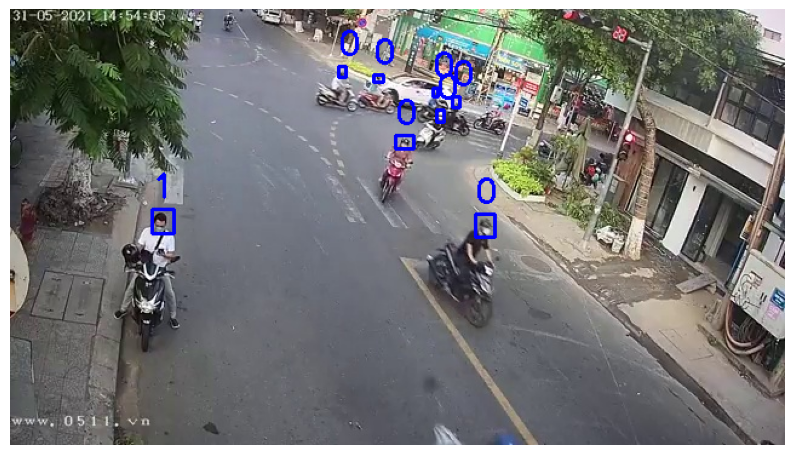

In [35]:
image = os.path.join('data_after_annotate', 'images', 'videoplayback2_73.jpg')
label = os.path.join('data_after_annotate', 'labels', 'videoplayback2_73.txt')

plot_labels(image, label)

In [32]:
def swap_label(txt_path):
    with open(txt_path, "r", encoding="utf8") as file:
        content = file.readlines()
    output = []
    for line in content:
        true_label = '1' if line[0]=='0' else '0'
        line = true_label + line[1:]
        output.append(line)
    with open(txt_path, "w", encoding="utf8") as file:
        file.writelines(output)


In [33]:
for i in os.listdir(src_dir+'//fixtxt'):
    print(i)
    swap_label(os.path.join(src_dir,'fixtxt', i))

videoplayback2_0.txt
videoplayback2_1.txt
videoplayback2_10.txt
videoplayback2_100.txt
videoplayback2_101.txt
videoplayback2_102.txt
videoplayback2_103.txt
videoplayback2_104.txt
videoplayback2_105.txt
videoplayback2_106.txt
videoplayback2_107.txt
videoplayback2_108.txt
videoplayback2_109.txt
videoplayback2_11.txt
videoplayback2_110.txt
videoplayback2_111.txt
videoplayback2_112.txt
videoplayback2_113.txt
videoplayback2_114.txt
videoplayback2_115.txt
videoplayback2_116.txt
videoplayback2_117.txt
videoplayback2_118.txt
videoplayback2_119.txt
videoplayback2_12.txt
videoplayback2_120.txt
videoplayback2_121.txt
videoplayback2_122.txt
videoplayback2_123.txt
videoplayback2_124.txt
videoplayback2_125.txt
videoplayback2_126.txt
videoplayback2_127.txt
videoplayback2_128.txt
videoplayback2_129.txt
videoplayback2_13.txt
videoplayback2_130.txt
videoplayback2_131.txt
videoplayback2_132.txt
videoplayback2_133.txt
videoplayback2_134.txt
videoplayback2_14.txt
videoplayback2_15.txt
videoplayback2_151.tx

In [37]:
# function to split data into train, valid, test and move them 

def split_data(src_dir, dest_dir, split_ratio=(0.8,0.1,0.1)):
    yolo_structure = {
        'train': ['images', 'labels'],
        'val': ['images', 'labels'],
        'test': ['images', 'labels']
    }

    # create folders 
    for split in yolo_structure:
        for folder in yolo_structure[split]:
            os.makedirs(os.path.join(dest_dir, split, folder), exist_ok=True)

    # read, shuffle and split
    images = os.listdir(os.path.join(src_dir,'images'))
    
    random.shuffle(images)
    labels = [path[:-4] + '.txt' for path in images]
    combined = list(zip(images, labels))

    total = len(combined)
    train_end = int(total*split_ratio[0])
    valid_end = train_end + int(total*split_ratio[1]) + 1

    splits = {
        'train': combined[:train_end],
        'val': combined[train_end:valid_end],
        'test': combined[valid_end:]
    }

    # move
    for split, files in splits.items():
        try:
            for img, label in files:
                shutil.move(os.path.join(src_dir,'images',img), os.path.join(dest_dir,split,'images',img))
                shutil.move(os.path.join(src_dir,'labels',label), os.path.join(dest_dir,split,'labels',label))
        except:
            print(label)


In [11]:
# check_dir_structure(data_structure, verbose=True)

NameError: name 'check_dir_structure' is not defined

In [ ]:
# check_dir_structure(yolo_data_structure, verbose=True)

missing dir: d:\pythonProject\DPL302m\data\train


False

In [12]:
config = {
   "train": os.path.join(dest_dir, 'train'),
   "val": os.path.join(dest_dir, 'val'),
   "nc": 2,
   "names": ['helmet','no_helmet']
}

with open(os.path.join(dest_dir,"data.yaml"), "w") as file:
   yaml.dump(config, file, default_flow_style=False)

In [38]:
num_img = len(os.listdir(os.path.join(src_dir,'images')))
num_label = len(os.listdir(os.path.join(src_dir,'labels')))

print(f'num_img: {num_img}')
print(f'num_label: {num_label}')


num_img: 828
num_label: 828


In [39]:
if num_img>0 or num_label>0:
    split_data(src_dir, dest_dir, split_ratio=(0.89,0.1,0.01))

In [ ]:
check_dir_structure(yolo_data_structure)

True

In [40]:
os.listdir(os.path.join(dest_dir,'test','images'))[0:5]

['11117.png',
 '11119.png',
 'night_vid2_127.jpg',
 'night_vid2_183.jpg',
 'videoplayback2_39.jpg']

In [41]:
num_train = len(os.listdir(os.path.join(dest_dir,'train','images')))
num_val = len(os.listdir(os.path.join(dest_dir,'val','images')))
num_test = len(os.listdir(os.path.join(dest_dir,'test','images')))

print(f'num_train: {num_train}')
print(f'num_val: {num_val}')
print(f'num_test: {num_test}')

num_train: 736
num_val: 83
num_test: 9
